<a href="https://colab.research.google.com/github/wombat-42/ML_LAB/blob/main/1BM22CS053_Linear_and_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving housing_area_price.csv to housing_area_price.csv


In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
f = list(uploaded.keys())[0]

df = pd.read_csv(f)

df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Price  coef intercept for the area = 3300
628715.7534246575 135.78767123287673 180616.43835616432


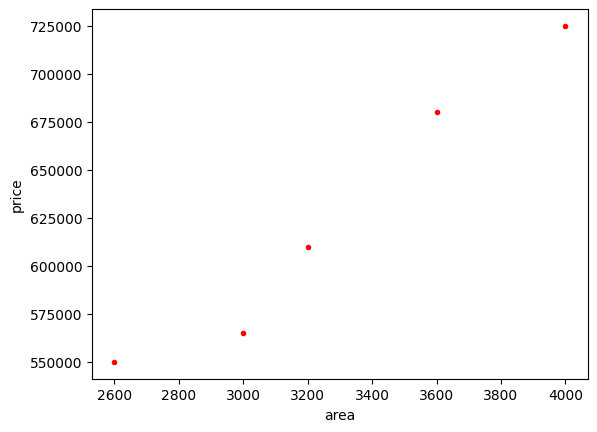

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='.')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

price1 = reg.predict([[3300]])[0]

z1 = reg.coef_[0]

z2 = reg.intercept_

print("Price coef intercept for the area = 3300")
print(price1,z1,z2)


# (1) Predict price of a home with area = 5000 sqr ft

price2 = reg.predict([[5000]])[0]

z3 = reg.coef_[0]
z4 = reg.intercept_


Saving canada_per_capita_income.csv to canada_per_capita_income (7).csv


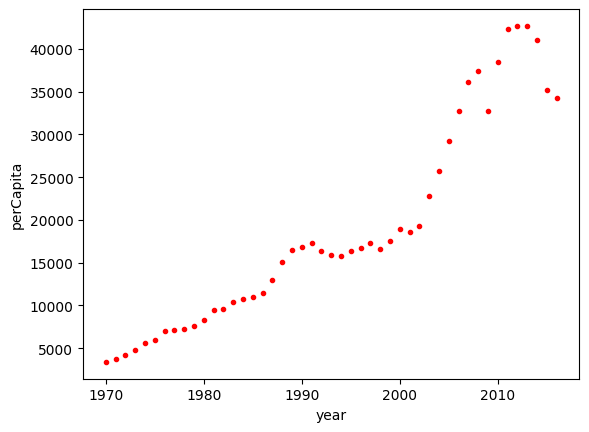

In [ ]:
#canada
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import files
uploaded = files.upload()

f = list(uploaded.keys())[0]

df = pd.read_csv(f)

df

plt.xlabel('year')
plt.ylabel('perCapita')
plt.scatter(df['year'],df['per capita income (US$)'],color='red',marker='.')

In [ ]:

# Feature (year) and target (per capita income)
X = df[['year']]  # Independent variable
y = df['per capita income (US$)']  # Dependent variable

# Build and train the regression model
model = LinearRegression()
model.fit(X, y)

# Predict per capita income for the year 2020
year_2020 = np.array([[2020]])
predicted_income = model.predict(year_2020)

print(f"The predicted per capita income for Canada in 2020 is: ${predicted_income[0]:.2f}")

income_coefficient = model.coef_[0]
income_intercept = model.intercept_

print(f"Coefficient for the Canada income model: {income_coefficient:.2f}")
print(f"Intercept for the Canada income model: {income_intercept:.2f}")

The predicted per capita income for Canada in 2020 is: $41288.69
Coefficient for the Canada income model: 828.47
Intercept for the Canada income model: -1632210.76


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The predicted salary for 12 years of experience is: 139500.53
Coefficient for the salary model: 9376.99
Intercept for the salary model: 26976.60


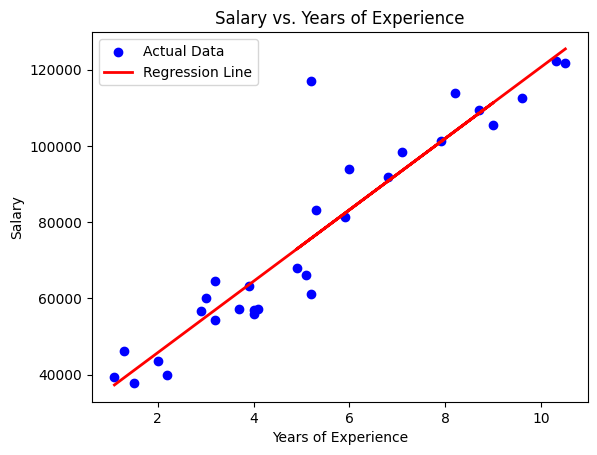

In [2]:
# LINEAR REGRESSION Q2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv("sample_data/salary.csv")

# Handle missing values in 'YearsExperience' using mean imputation
imputer = SimpleImputer(strategy="mean")
data['YearsExperience'] = imputer.fit_transform(data[['YearsExperience']])

# Define features and target variable
X = data[['YearsExperience']]
y = data['Salary']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the salary for 12 years of experience
years_experience = np.array([[12]])
predicted_salary = model.predict(years_experience)

print(f"The predicted salary for 12 years of experience is: {predicted_salary[0]:.2f}")

# Coefficient and intercept for the salary model
salary_coefficient = model.coef_[0]
salary_intercept = model.intercept_

print(f"Coefficient for the salary model: {salary_coefficient:.2f}")
print(f"Intercept for the salary model: {salary_intercept:.2f}")

# Plot the data and regression line
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs. Years of Experience")
plt.legend()
plt.show()


Predicted salary for 2 years experience, 9 test score, 6 interview score: $53290.89
Predicted salary for 12 years experience, 10 test score, 10 interview score: $92268.07
Coefficients: [2827.63404314 1912.93803053 2196.9753141 ]
Intercept: 17237.330313727172


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


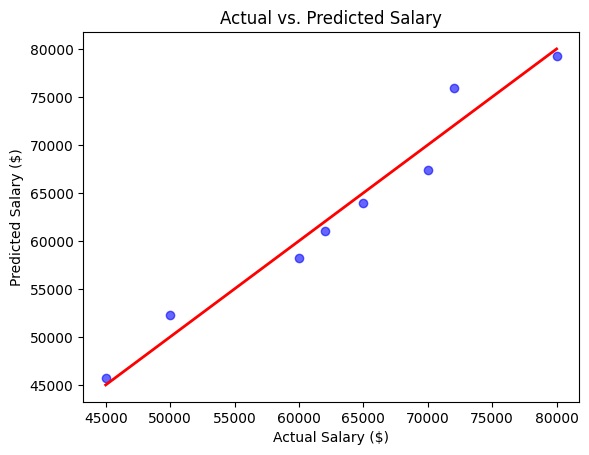

In [4]:
# MULTIPLE REGRESSION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv("sample_data/hiring.csv")

# Data Preprocessing
# Replace non-numeric experience values with numeric values
def convert_experience(x):
    word_to_num = {
        "zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5,
        "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10,
        "eleven": 11, "twelve": 12
    }
    return word_to_num.get(x, 0)  # Default to 0 if experience is NaN or not in the mapping

data['experience'] = data['experience'].apply(convert_experience)

# Handle missing values in the 'test_score(out of 10)' column using mean imputation
imputer = SimpleImputer(strategy="mean")
data['test_score(out of 10)'] = imputer.fit_transform(data[['test_score(out of 10)']])

# Define features (X) and target variable (y)
X = data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = data['salary($)']

# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Predict salaries for new candidates
candidates = np.array([[2, 9, 6], [12, 10, 10]])  # Candidate data: [experience, test score, interview score]
predicted_salaries = model.predict(candidates)

# Print results
print(f"Predicted salary for 2 years experience, 9 test score, 6 interview score: ${predicted_salaries[0]:.2f}")
print(f"Predicted salary for 12 years experience, 10 test score, 10 interview score: ${predicted_salaries[1]:.2f}")

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Plot actual vs. predicted salaries
plt.scatter(y, model.predict(X), color="blue", alpha=0.6)
plt.xlabel("Actual Salary ($)")
plt.ylabel("Predicted Salary ($)")
plt.title("Actual vs. Predicted Salary")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)  # Perfect prediction line
plt.show()


Coefficients: [ 1.16208642e+02 -3.30144893e+02  2.13936251e+02  5.53149346e-01
  1.02624663e+00  8.10861610e-02]
Intercept: -70167.45814579418


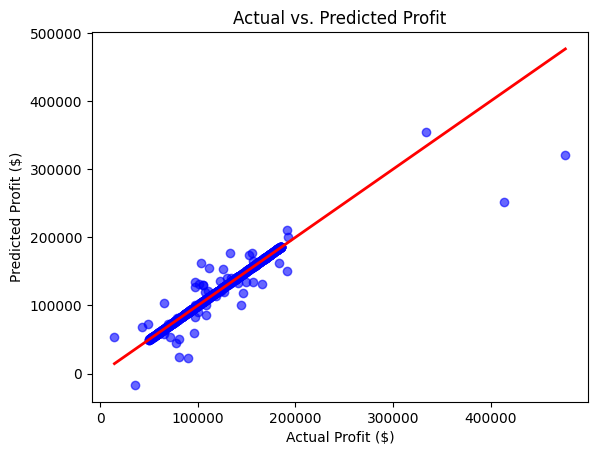

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv("sample_data/1000_Companies.csv")

# Separate features (X) and target (y)
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]  # Independent variables
y = data['Profit']  # Dependent variable

# Handle categorical data in the 'State' column using OneHotEncoder
preprocessor = ColumnTransformer(transformers=[
    ('state', OneHotEncoder(), ['State'])
], remainder='passthrough')  # Keep other columns unchanged

# Create and train the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X, y)

# Extract coefficients and intercept
regressor = model.named_steps['regressor']
coefficients = regressor.coef_
intercept = regressor.intercept_

# Output coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Predict profits
predicted_profits = model.predict(X)

# Plot actual vs. predicted profits
plt.scatter(y, predicted_profits, color="blue", alpha=0.6)
plt.xlabel("Actual Profit ($)")
plt.ylabel("Predicted Profit ($)")
plt.title("Actual vs. Predicted Profit")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)  # Perfect prediction line
plt.show()
